# Student Performance

ข้อมูลผลการเรียนของนักเรียนใน 3 วิชา เลข (Math) การอ่าน (Reading) และ การเขียน (Writing) ทุกวิชาคะแนนเต็มร้อย

### Data Description

| Variable | Definition |
| -------- | ---------- |
| gender | male, female |
| race/ethinicity | race/ethinicity group (A, B, C, D, E) |
| parental level of education | Parent's education level <br> (some high school, high school, some college, associate's degree, bachelor's degree, master degree) |
| lunch | lunch program in high school (free/reduced, standard) |
| test preparation course | Whether the student took a the test preparation course (none, completed) |
| math score | exam score for Math subject |
| reading score | exam score for reading subject |
| writing score | exam score for writing subject |

**Variable Note**

parental level of education เรียงจากต่ำไปสูงคือ
1. some high school
2. high school
3. some college
4. associate's degree
5. bachelor's degree
6. master degree

### Objective:
**ให้สร้าง model ทำนายผลคะแนนเฉลี่ย และตอบคำถามต่อไปนี้**

- การเรียน test preparation course ส่งผลต่อผลคะแนนวิชาเลขไหม?
- การเรียน test preparation course ส่งผลต่อผลคะแนนวิชาการอ่านไหม?
- การเรียน test preparation course ส่งผลต่อผลคะแนนวิชาการเขียนไหม?
- ปัจจัย 3 ลำดับแรกที่ส่งผลต่อคะแนนเฉลี่ยของนักเรียน?

##สมาชิกกลุ่ม
- 61050832 นางสาวณิชากร แพงาม
- 61050852 นางสาวปณิตา ประกอบแก้ว
- 61070363 นายโสภณ วงศ์ใหญ่
- 62010362 นายธนภัทร เนาถาวร

##Import Library

In [ ]:
# manage data
import pandas as pd
import numpy as np

# plot
import seaborn as sns
import matplotlib.pyplot as plt

# split data
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, f_regression

##Import Data

In [ ]:
!git clone https://github.com/SophonWongyai/AIDL

fatal: destination path 'AIDL' already exists and is not an empty directory.


นำเข้าข้อมูลไฟล์ students_performance.csv

In [ ]:
data = pd.read_csv('/content/AIDL/Python for ML&DS/Mini Project/students_performance.csv')

# Data Understanding

| Variable | Definition |
| -------- | ---------- |
| gender | male, female |
| race/ethinicity | race/ethinicity group (A, B, C, D, E) |
| parental level of education | Parent's education level <br> (some high school, high school, some college, associate's degree, bachelor's degree, master degree) |
| lunch | lunch program in high school (free/reduced, standard) |
| test preparation course | Whether the student took a the test preparation course (none, completed) |
| math score | exam score for Math subject |
| reading score | exam score for reading subject |
| writing score | exam score for writing subject |

อธิบายประเภทของข้อมูล
* Nominal
      gender, race/ethinicity, lunch, test preparation course
* Ordinal
      parental level of education
* Interval
      math score, reading score, writing score
* Ratio

## Basic Explore Data

ใช้ head(), shape, column, descibe(), info() เพื่อดูข้อมูลเบื้องต้น

In [ ]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
data = data.rename(columns={'race/ethnicity':'race/ethinicity'})
data.head(1)

,gender,race/ethinicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74


In [ ]:
data.shape

(1000, 8)

In [ ]:
data.columns

Index(['gender', 'race/ethinicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethinicity              1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.389000,69.269000,68.154000
std,16.223714,15.143909,15.469182
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,229.000000,200.000000,160.000000


>พบว่า มีทั้งหมด 1000 rows 8 columns

* เป็น Categorical Data 5 columns ได้แก่ 
      gender, race/ethnicity, parental level of education, lunch, test preparation course, 
* เป็น Numerical Data 3 columns ได้แก่ 
      math score, reading score, writing score

## Check Value of Categorical Data

In [ ]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [ ]:
data['race/ethinicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethinicity, dtype: int64

In [ ]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [ ]:
data['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [ ]:
data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

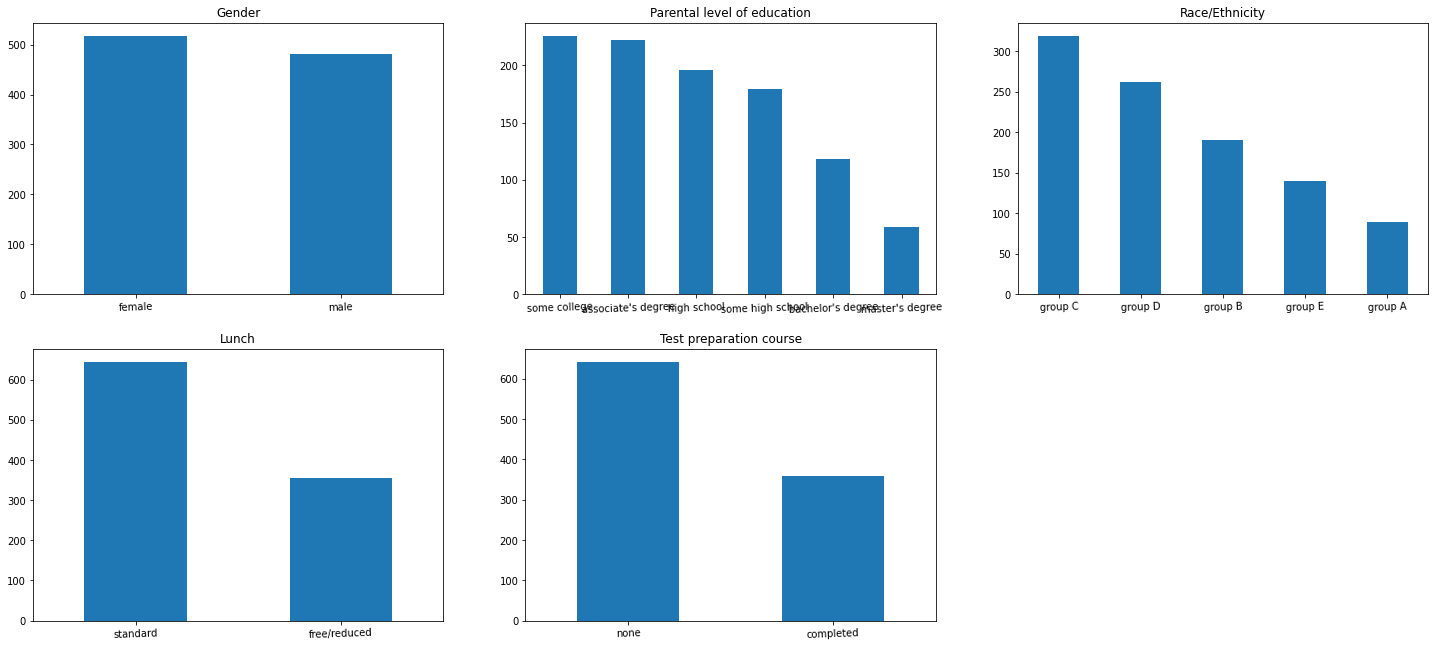

In [ ]:
# plot categorical data
plt.figure(figsize=(25,11))
plt.subplot(231) 
data['gender'].value_counts(normalize=False).plot.bar(title= 'Gender',rot=2) 
plt.subplot(232) 
data['parental level of education'].value_counts(normalize=False).plot.bar(title= 'Parental level of education',rot=2) 
plt.subplot(233) 
data['race/ethinicity'].value_counts(normalize=False).plot.bar(title= 'Race/Ethnicity',rot=2)
plt.subplot(234) 
data['lunch'].value_counts(normalize=False).plot.bar(title= 'Lunch',rot=2)
plt.subplot(235) 
data['test preparation course'].value_counts(normalize=False).plot.bar(title= 'Test preparation course',rot=2)

##Check Value of Numerical Data

In [ ]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.389000,69.269000,68.154000
std,16.223714,15.143909,15.469182
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,229.000000,200.000000,160.000000


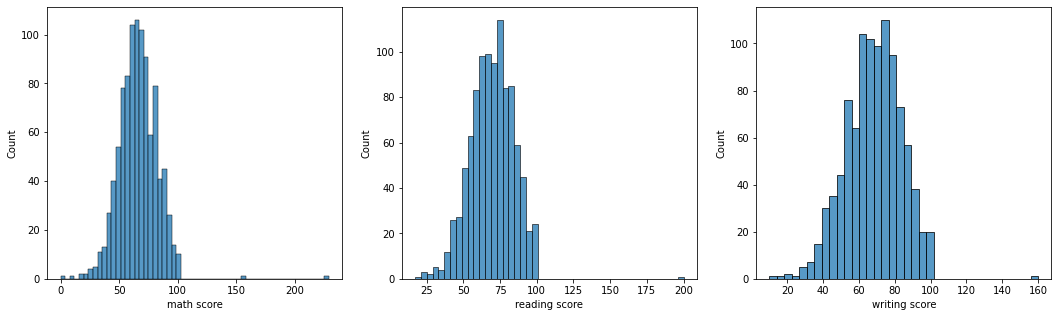

In [ ]:
# plot numerical data
plt.figure(figsize=(18,5))
plt.subplot(131) 
sns.histplot(data['math score'])
plt.subplot(132) 
sns.histplot(data['reading score'])
plt.subplot(133) 
sns.histplot(data['writing score'])

##Verify Data Quality
>ตรวจสอบคุณภาพ หรือ ความสมบูรณ์ ของข้อมูล

### Missing Data

In [ ]:
data.isnull().sum()

gender                         0
race/ethinicity                0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

>ไม่พบค่า null

“gender”, “parental level of education”, “race/ethnicity”, “lunch”, “test preparation course” are categorical variables.

“math score”, “read score”, “write score” contain numerical values and hence are numerical variables.

### Outliers

![iqr](https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png)

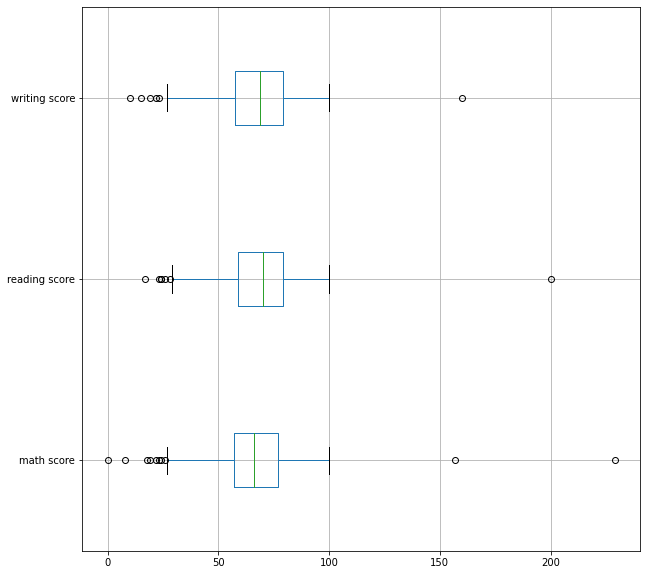

In [ ]:
#Check Outliers with Boxplot 
data.boxplot(vert=False, figsize=(10,10))

จาก Boxplot เกิด outlier ขึ้น
ทำให้เห็นว่าคะแนนเต็มแต่ละวิชาควรได้คะแนนมากที่สุด 100

# Data Preparetion

## Clean Data

In [ ]:
data.shape

(1000, 8)

### Clean Outliers

Clean Outliers at Interquartile Range > 100 score



In [ ]:
# math score > 100
print("math score > 100 : ",len(data[data["math score"]>100]))
# reading score > 100
print("reading score > 100 : ",len(data[data["reading score"]>100]))
# writing score > 100
print("writing score > 100 : ",len(data[data["writing score"]>100]))

math score > 100 :  2
reading score > 100 :  1
writing score > 100 :  1


###Drop data

In [ ]:
# drop case > 100
data[data["math score"] > 100].index
data.drop(data[data["math score"] > 100].index, inplace=True)

data[data["reading score"] > 100].index
data.drop(data[data["reading score"] > 100].index, inplace=True)

data[data["writing score"] > 100].index
data.drop(data[data["writing score"] > 100].index, inplace=True)

In [ ]:
data.shape

(996, 8)

## Average Score

In [ ]:
# Average Score
data['avg_score'] = (data['math score'] + data['reading score'] + data['writing score']) / 3
data[['avg_score']].head()

,avg_score
0,72.666667
1,82.333333
2,92.666667
3,49.333333
4,76.333333


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b5f437610>,
      dtype=object)

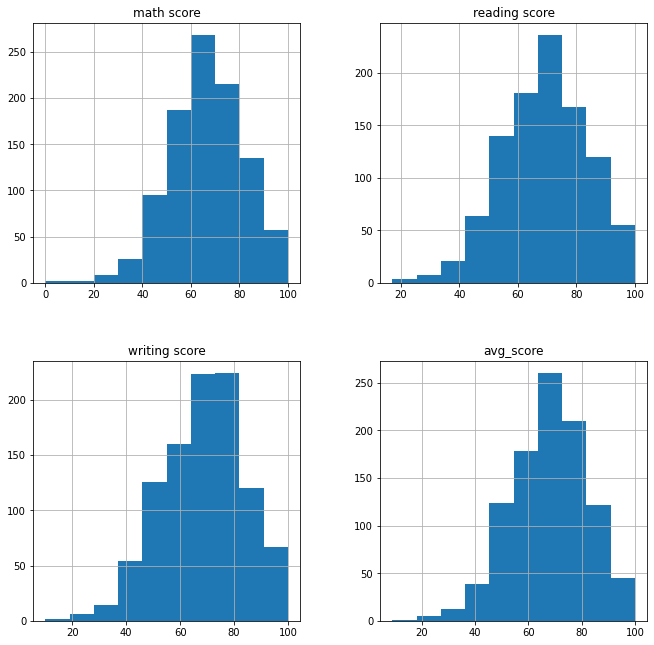

In [ ]:
data[data.dtypes[(data.dtypes=="float64")|(data.dtypes=="int64")].index.values].hist(figsize=[11,11])

##Distribution plot of the scores
Seaborn Distplot  tes

###Math Score

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


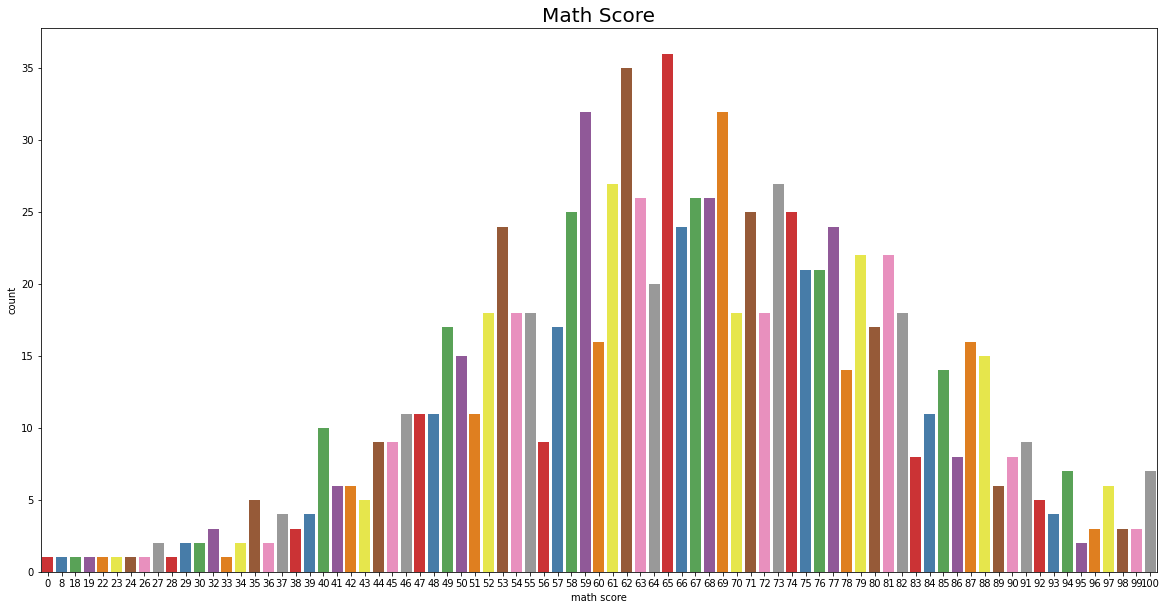

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(data['math score'], palette = 'Set1')
plt.title('Math Score',fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


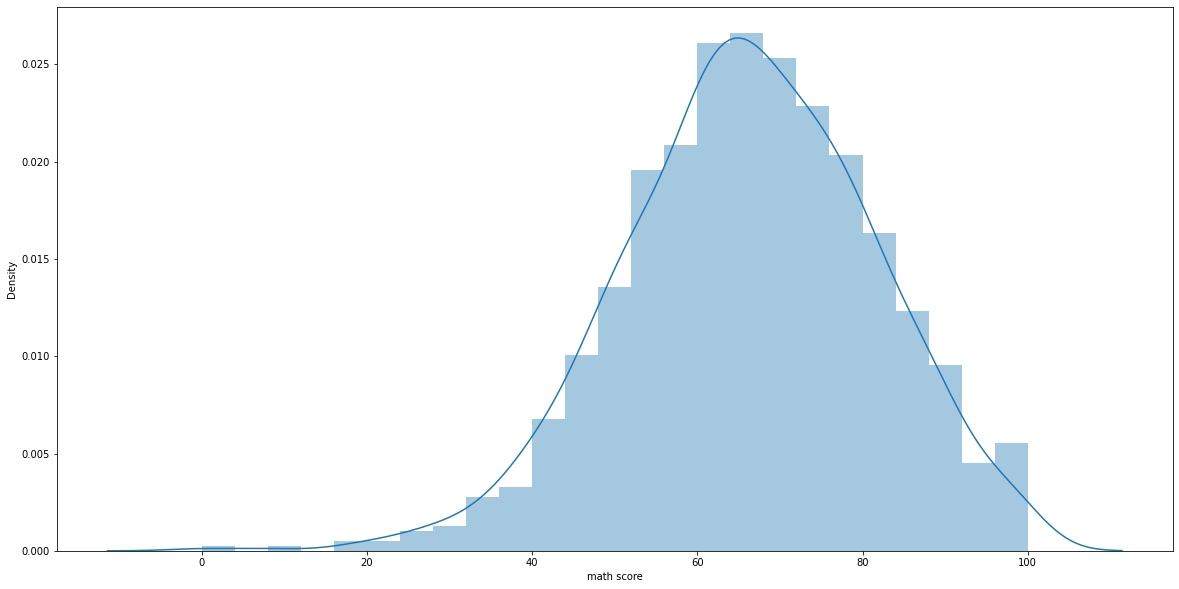

In [ ]:
sns.distplot(data['math score'])

###Reading Score

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


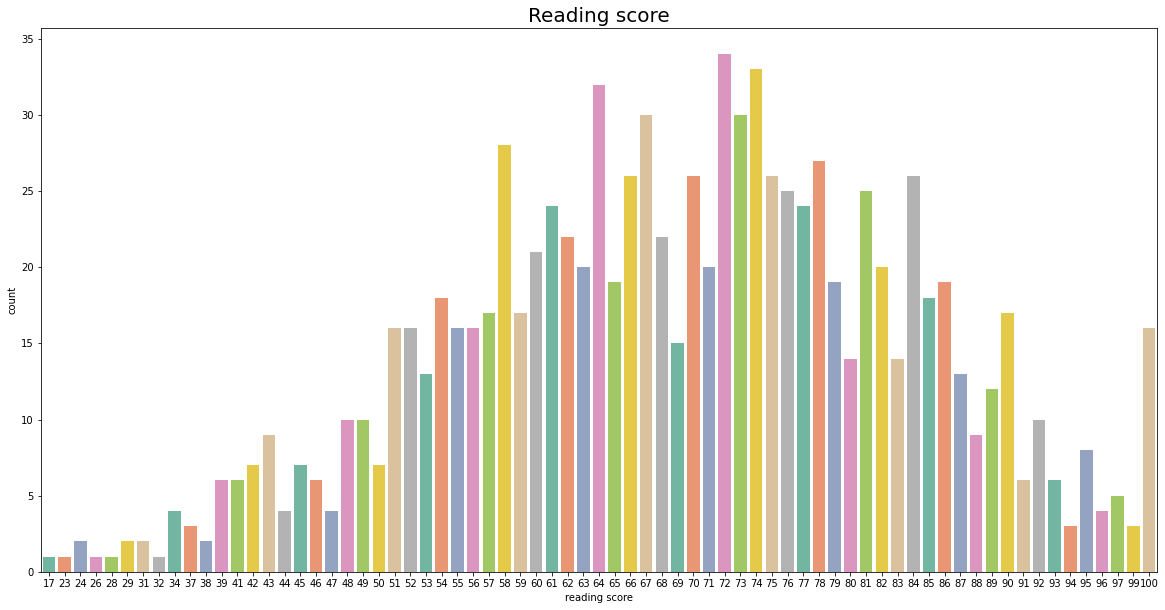

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(data['reading score'], palette = 'Set2')
plt.title('Reading score',fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


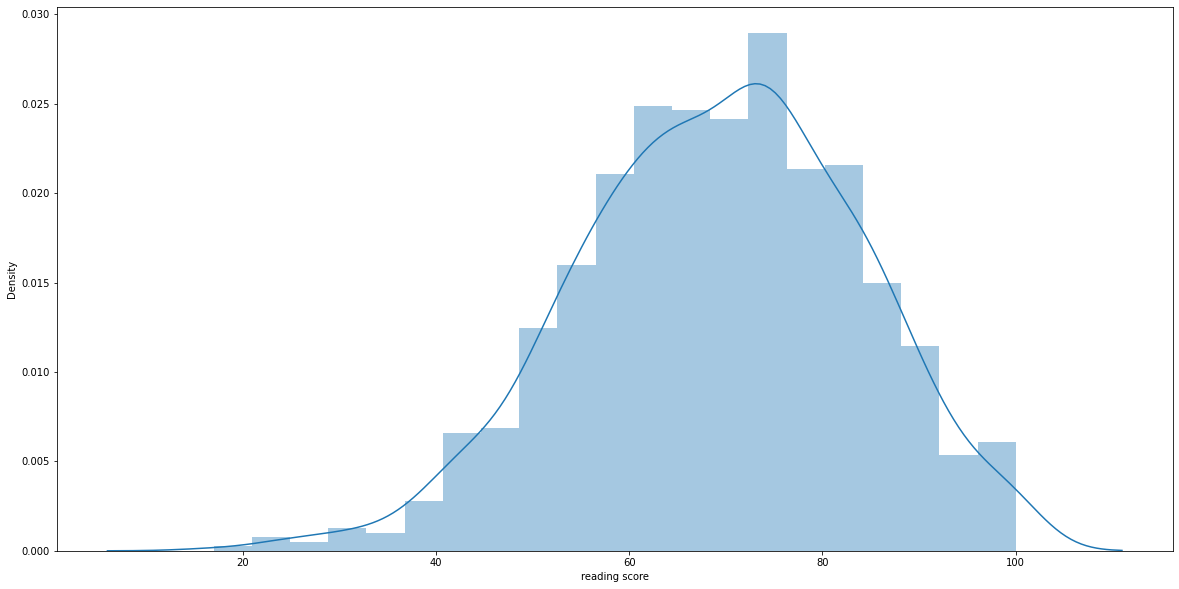

In [ ]:
sns.distplot(data['reading score'])

###Writing Score

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


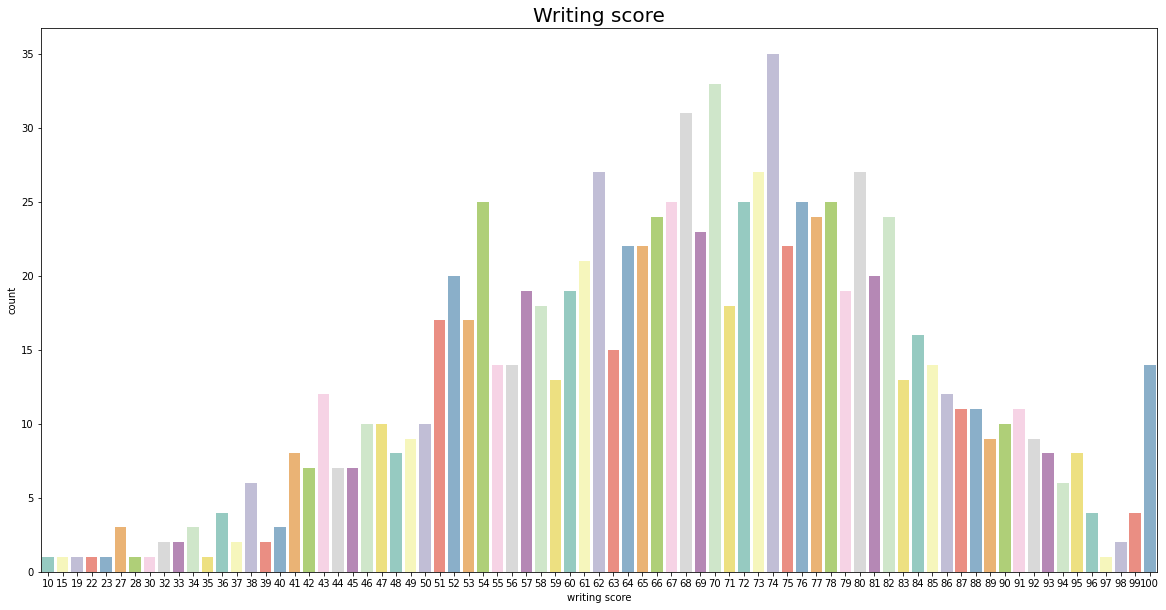

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(data['writing score'], palette = 'Set3')
plt.title('Writing score',fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


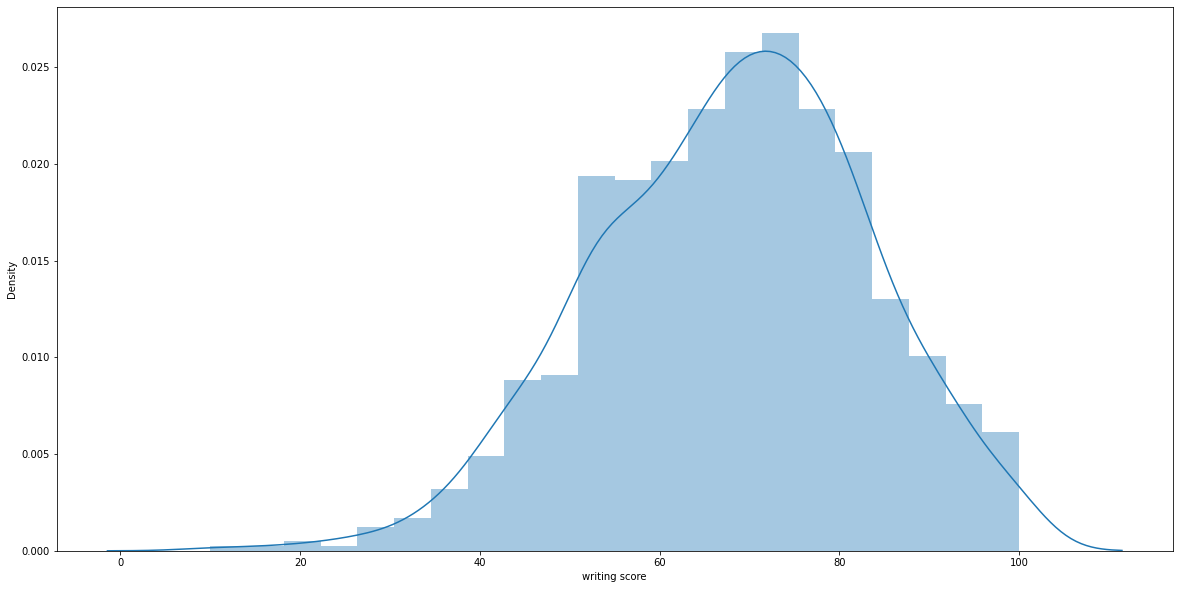

In [ ]:
sns.distplot(data['writing score'])

## Transform Categorical Data

| Variable | Definition |
| -------- | ---------- |
| gender | male, female |
| race/ethinicity | race/ethinicity group (A, B, C, D, E) |
| parental level of education | Parent's education level <br> (some high school, high school, some college, associate's degree, bachelor's degree, master degree) |
| lunch | lunch program in high school (free/reduced, standard) |
| test preparation course | Whether the student took a the test preparation course (none, completed) |
| math score | exam score for Math subject |
| reading score | exam score for reading subject |
| writing score | exam score for writing subject |

In [ ]:
data.dtypes

gender                          object
race/ethinicity                 object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
avg_score                      float64
dtype: object

###One hot

In [ ]:
# # one-hot-encode categorical columns
# def one_hot_encode(_dataframe, list_of_columns_to_one_hot_encode):
#     for column in list_of_columns_to_one_hot_encode:
#         # one-hot-encode this column
#         one_hot_encoded_values = pd.get_dummies(_dataframe[column], prefix=column)

#         # join the one-hot-encoded values with original dataframe
#         _dataframe = pd.concat([_dataframe, one_hot_encoded_values], axis=1)

#         # drop the original column, we don't need it anymore
#         _dataframe.drop([column], axis=1, inplace=True)
    
#     return _dataframe

# # get a list of all columns with categorical values
# categorical_columns = data.select_dtypes(exclude=['int', 'float']).columns

# data = one_hot_encode(data, categorical_columns)
# data.head()

In [ ]:
data['gender'] = data['gender'].map({'female':0,
                                     'male':1})
data['race/ethinicity'] = data['race/ethinicity'].map({'group B': 0 ,
                                                     'group C' : 1 , 
                                                     'group A' : 2 , 
                                                     'group D' : 3 , 
                                                     'group E' : 4})
data['parental level of education'] = data['parental level of education'].map({'some high school': 0,
                                                                              'high school':1,
                                                                              'some college':2,
                                                                              "associate's degree":3,
                                                                              "bachelor's degree":4,
                                                                              "master's degree":5})
data['lunch'] = data['lunch'].map({'standard':0,
                                   'free/reduced':1})
data['test preparation course'] = data['test preparation course'].map({'none':0,
                                                                       'completed':1})

In [ ]:
data.head()

,gender,race/ethinicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,0,0,4,0,0,72,72,74,72.666667
1,0,1,2,0,1,69,90,88,82.333333
2,0,0,5,0,0,90,95,93,92.666667
3,1,2,3,1,0,47,57,44,49.333333
4,1,1,2,0,0,76,78,75,76.333333


## Pair Plot

In [ ]:
data.columns

Index(['gender', 'race/ethinicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'avg_score'],
      dtype='object')

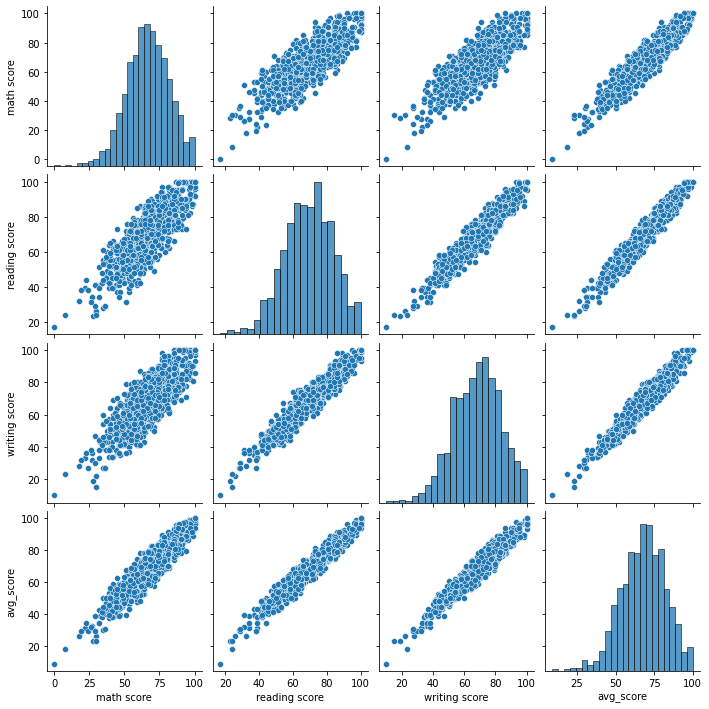

In [ ]:
sns.pairplot(data[['math score', 'reading score', 'writing score', 'avg_score']])

##Correlation
> อาจลบอันบนออก

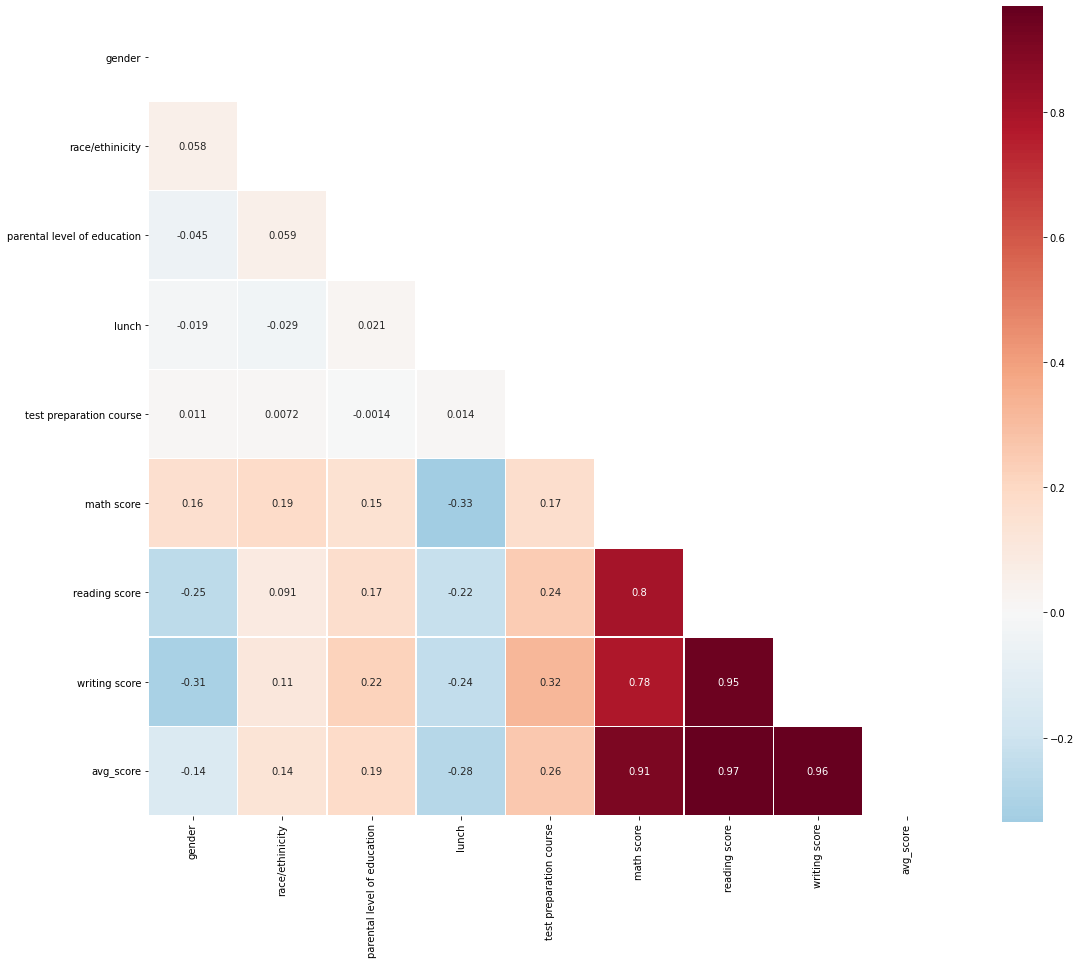

In [ ]:
corr = data.corr(method='spearman')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18, 15))

sns.heatmap(corr, annot = True, mask=mask, cmap="RdBu_r", center=0,
            square=True, linewidths=.5)

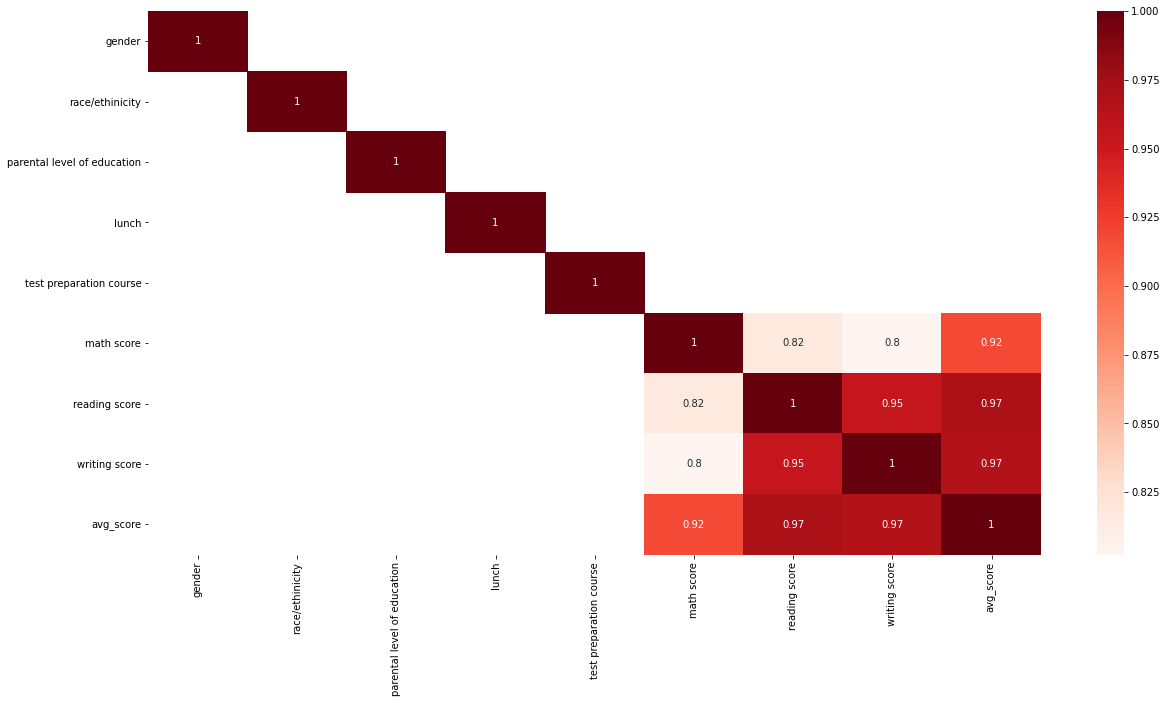

In [ ]:
corrMatrix = data.corr()
highCorr = corrMatrix[corrMatrix >= .8]
sns.heatmap(highCorr, annot=True, cmap="Reds")
plt.show()

In [ ]:
data.corr()

,gender,race/ethinicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
gender,1.000000,0.058346,-0.046937,-0.018796,0.010736,0.167464,-0.245576,-0.301618,-0.131749
race/ethinicity,0.058346,1.000000,0.059395,-0.030100,0.007148,0.193820,0.100376,0.119100,0.145300
parental level of education,-0.046937,0.059395,1.000000,0.023858,-0.003712,0.159689,0.192545,0.238663,0.207187
lunch,-0.018796,-0.030100,0.023858,1.000000,0.013944,-0.347714,-0.226855,-0.244429,-0.287577
test preparation course,0.010736,0.007148,-0.003712,0.013944,1.000000,0.181127,0.243333,0.313639,0.258784
math score,0.167464,0.193820,0.159689,-0.347714,0.181127,1.000000,0.816401,0.802256,0.918339
reading score,-0.245576,0.100376,0.192545,-0.226855,0.243333,0.816401,1.000000,0.954495,0.970092
writing score,-0.301618,0.119100,0.238663,-0.244429,0.313639,0.802256,0.954495,1.000000,0.965729
avg_score,-0.131749,0.145300,0.207187,-0.287577,0.258784,0.918339,0.970092,0.965729,1.000000


#Model (Multiple Regression)


## Fix X

In [ ]:
features = ['gender','race/ethinicity','parental level of education','lunch',
     'test preparation course']
#,'math score','reading score','writing score'
X = data[list(features)]


## Feature Selection Function

In [ ]:
# feature selection function
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

## Math Score

### Fix y at math score

In [ ]:
features_math = ['gender','race/ethinicity','parental level of education','lunch',
     'test preparation course', 'reading score','writing score']

X = data[list(features_math)]

y = data['math score']

### Train and Test Data

In [ ]:
data.head(1)

,gender,race/ethinicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,0,0,4,0,0,72,72,74,72.666667


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

###Training Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Check coefficients

In [ ]:
model.coef_

array([13.39050009,  0.5792306 , -0.27316802, -3.36982076, -3.1744831 ,
        0.31249969,  0.64955118])

In [ ]:
pd.DataFrame(model.coef_, index=X.columns, columns=['Coeff'])

,Coeff
gender,13.390500
race/ethinicity,0.579231
parental level of education,-0.273168
lunch,-3.369821
test preparation course,-3.174483
reading score,0.312500
writing score,0.649551


###Predicting Test Data

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([51.34967458, 65.52538421, 62.53820992, 84.9862222 , 43.96818927,
       68.80137913, 64.34402884, 68.16844475, 78.29763494, 85.33016215,
       79.42016802, 68.88602821, 74.34628506, 74.41826328, 55.8141023 ,
       68.78805356, 92.73823854, 54.67441661, 58.07261071, 57.16464627,
       92.62065128, 74.38147814, 83.91934771, 81.10685054, 30.02558097,
       98.7036192 , 68.7787432 , 76.51735503, 81.68480614, 49.32070975,
       75.91395526, 69.96645672, 57.01354313, 68.31311079, 68.2016216 ,
       58.80632428, 54.55311599, 59.67517996, 73.94975761, 72.980887  ,
       69.2037684 , 89.95317254, 68.17342756, 44.8380915 , 78.89073107,
       71.05943008, 68.50549624, 46.13189814, 68.81247176, 72.51242632,
       92.70724963, 82.08202363, 71.13372226, 84.51186439, 44.01487098,
       33.44997484, 45.9275528 , 55.9747448 , 74.33379349, 68.96802639,
       47.35772771, 51.68435884, 89.37248764, 51.54921641, 67.54639758,
       70.2544046 , 72.82335698, 61.46197536, 81.63820337, 69.70

วาด scatterplot เพื่อเปรียบเทียบ y_test และ y_pred

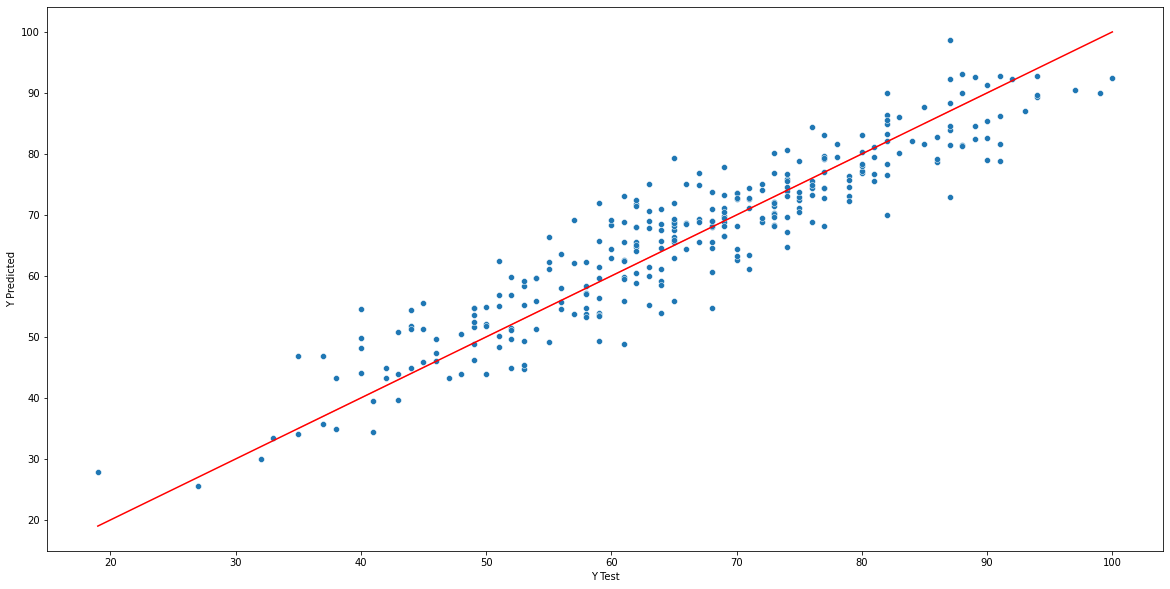

In [ ]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
sns.lineplot(x=y_test, y=y_test, color='red')

###Evaluating Model 
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error : {rmse}')

Mean Absolute Error: 4.39256185147196
Mean Square Error: 29.643841768041575
Root Mean Square Error : 5.4446158512829514


In [ ]:
y.describe()

count    996.000000
mean      66.104418
std       15.122121
min        0.000000
25%       57.000000
50%       66.000000
75%       77.000000
max      100.000000
Name: math score, dtype: float64

In [ ]:
print('Accuracy:',metrics.r2_score(y_test, y_pred)) 

Accuracy: 0.8603988631955547


###Residuals

In [ ]:
res = y_test - y_pred
res.describe()

count    299.000000
mean      -0.411224
std        5.438166
min      -14.569394
25%       -3.728237
50%       -0.449975
75%        3.198444
max       14.019113
Name: math score, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


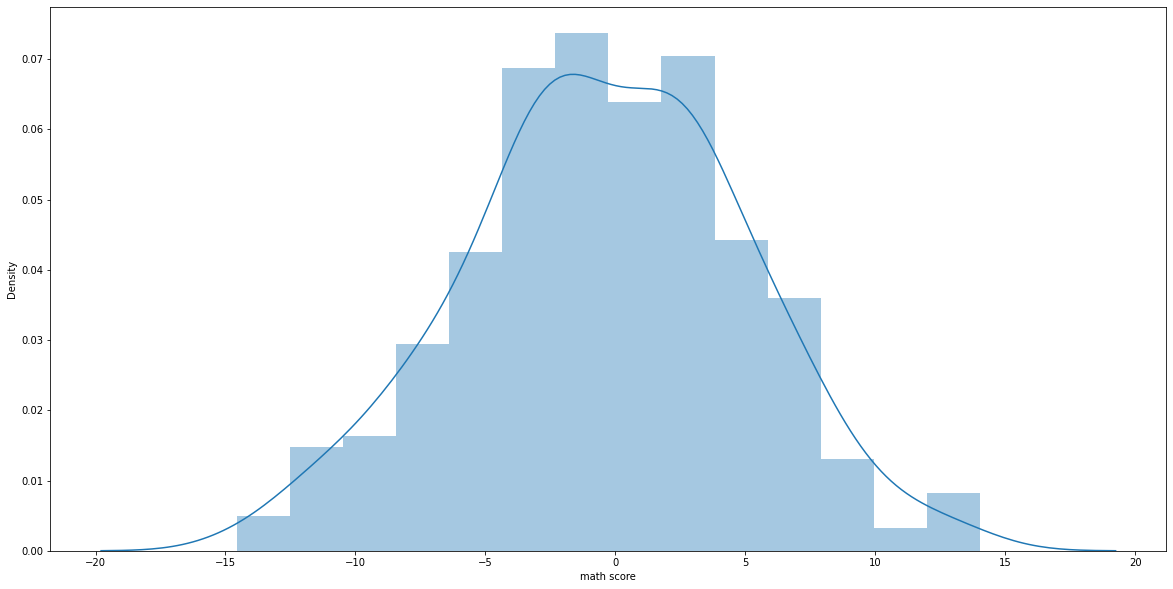

In [ ]:
sns.distplot(res)

### Correlation Feature Selection

In [ ]:
data.head()

,gender,race/ethinicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,0,0,4,0,0,72,72,74,72.666667
1,0,1,2,0,1,69,90,88,82.333333
2,0,0,5,0,0,90,95,93,92.666667
3,1,2,3,1,0,47,57,44,49.333333
4,1,1,2,0,0,76,78,75,76.333333


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 23.804687
Feature 1: 35.484613
Feature 2: 24.603619
Feature 3: 94.051190
Feature 4: 22.700796
Feature 5: 1359.133622
Feature 6: 1264.986127


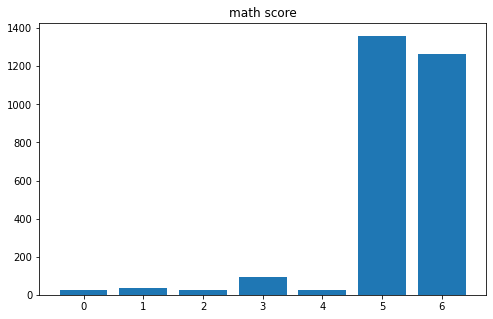

<Figure size 1440x720 with 0 Axes>

In [ ]:
# plot the scores
plt.figure(figsize=(8,5))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title('math score')
plt.show()
plt.savefig('math_score.png')

In [ ]:
features_math

['gender',
 'race/ethinicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'reading score',
 'writing score']

> Feature ที่ส่งผลต่อ Math Score คือ lunch , race_group E และ test preparation course 

## Reading Score

### Fix y at reading score

In [ ]:
y = data['reading score']

### Train and Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

###Training Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

Check coefficients

In [ ]:
model.coef_

In [ ]:
pd.DataFrame(model.coef_, index=X.columns, columns=['Coeff'])

###Predicting Test Data

In [ ]:
y_pred = model.predict(X_test)
y_pred

วาด scatterplot เพื่อเปรียบเทียบ y_test และ y_pred

In [ ]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
sns.lineplot(x=y_test, y=y_test, color='red')

###Evaluating Model 
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error : {rmse}')

In [ ]:
y.describe()

In [ ]:
print('Accuracy:',metrics.r2_score(y_test, y_pred)) 

###Residuals

In [ ]:
res = y_test - y_pred
res.describe()

In [ ]:
sns.distplot(res)

### Correlation Feature Selection

In [ ]:
data.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

In [ ]:
# plot the scores
plt.figure(figsize=(8,5))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title('reading score')
plt.show()
plt.savefig('reading_score.png')

In [ ]:
data.head(1)

> Feature ที่ส่งผลต่อ Reading Score มากที่สุด คือ gender, test prepareation course, และ lunch ตามลำดับ

## Writing Score

### Fix y at writing score

In [ ]:
y = data['writing score']

### Train and Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

###Training Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

Check coefficients

In [ ]:
model.coef_

In [ ]:
pd.DataFrame(model.coef_, index=X.columns, columns=['Coeff'])

###Predicting Test Data

In [ ]:
y_pred = model.predict(X_test)
y_pred

วาด scatterplot เพื่อเปรียบเทียบ y_test และ y_pred

In [ ]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
sns.lineplot(x=y_test, y=y_test, color='red')

###Evaluating Model 
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error : {rmse}')

In [ ]:
y.describe()

In [ ]:
print('Accuracy:',metrics.r2_score(y_test, y_pred)) 

###Residuals

In [ ]:
res = y_test - y_pred
res.describe()

In [ ]:
sns.distplot(res)

### Correlation Feature Selection

In [ ]:
data.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

In [ ]:
# plot the scores
plt.figure(figsize=(8,5))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title('writing score')
plt.show()
plt.savefig('writing_score.png')

In [ ]:
data.head(1)

> Feature ที่ส่งผลต่อ Writing Score มากที่สุด คือ test preparetion, และ gender ตามลำดับ

## Average Score

### Fix y at average score

In [ ]:
y = data['avg_score']

### Train and Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

###Training Model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Check coefficients

In [ ]:
model.coef_

array([-3.91193332,  1.61591786,  2.03412155, -8.77043834,  7.72071302])

In [ ]:
pd.DataFrame(model.coef_, index=X.columns, columns=['Coeff'])

,Coeff
gender,-3.911933
race/ethinicity,1.615918
parental level of education,2.034122
lunch,-8.770438
test preparation course,7.720713


###Predicting Test Data

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([53.96633721, 59.65049817, 62.58046576, 68.26462672, 71.07825876,
       70.03928487, 58.81409079, 73.530584  , 66.64870886, 64.77089709,
       77.33936369, 70.30117878, 70.45748856, 71.23699904, 77.5988271 ,
       77.18305391, 72.49161011, 58.81409079, 70.44430662, 57.61637662,
       75.56470555, 61.94651363, 72.8529169 , 72.8529169 , 60.27369887,
       74.10752797, 63.56486199, 82.86721487, 64.3526934 , 64.34194197,
       73.530584  , 68.68283041, 68.4209365 , 66.37606352, 64.50068226,
       69.4623409 , 64.76014566, 70.29874827, 56.77996924, 68.15072167,
       81.25129701, 77.18305391, 60.70265399, 71.91709664, 70.18484322,
       75.30524214, 73.530584  , 70.18484322, 61.68461972, 60.2844503 ,
       76.14164952, 72.49161011, 61.94651363, 73.11238031, 53.96633721,
       57.46006684, 70.44430662, 57.87827053, 70.03685436, 75.98533974,
       62.4641302 , 60.2844503 , 66.38924546, 65.59655304, 82.86721487,
       68.68283041, 66.79669772, 75.14650186, 73.5330145 , 78.01

วาด scatterplot เพื่อเปรียบเทียบ y_test และ y_pred

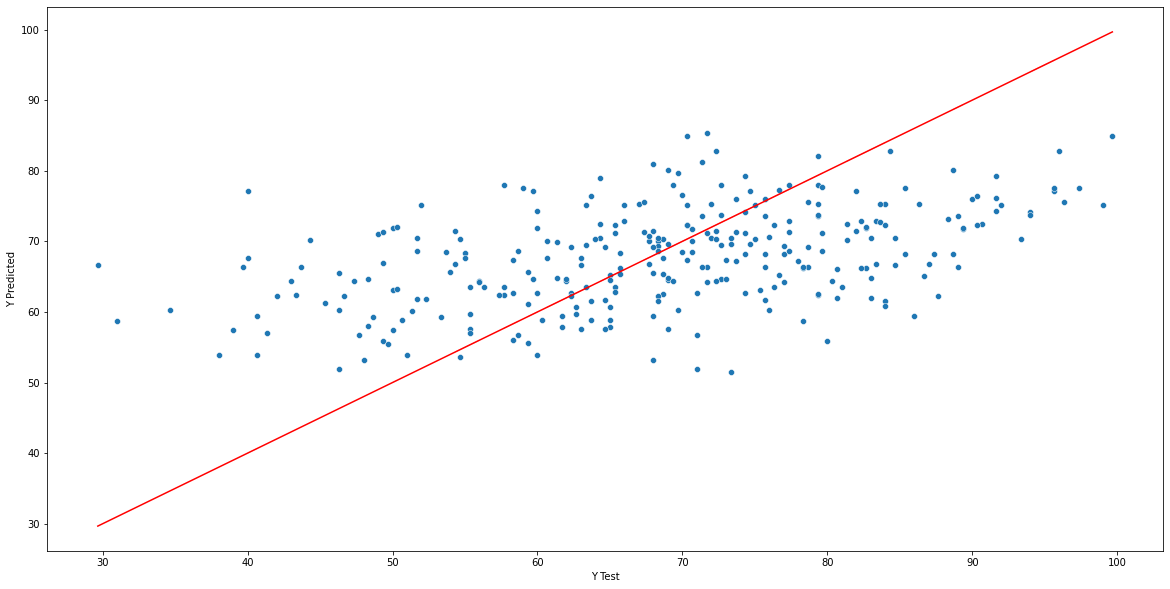

In [ ]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
sns.lineplot(x=y_test, y=y_test, color='red')

###Evaluating Model 
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error

In [ ]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Square Error: {mse}')
print(f'Root Mean Square Error : {rmse}')

Mean Absolute Error: 9.9061722094363
Mean Square Error: 150.9800302705107
Root Mean Square Error : 12.287393143808442


In [ ]:
y.describe()

count    996.000000
mean      67.776104
std       14.224983
min        9.000000
25%       58.333333
50%       68.333333
75%       77.666667
max      100.000000
Name: avg_score, dtype: float64

In [ ]:
print('Accuracy:',metrics.r2_score(y_test, y_pred)) 

Accuracy: 0.2118793377107242


###Residuals

In [ ]:
res = y_test - y_pred
res.describe()

count    299.000000
mean       0.765311
std       12.284096
min      -37.180623
25%       -7.115533
50%        1.313872
75%        9.424218
max       26.505812
Name: avg_score, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


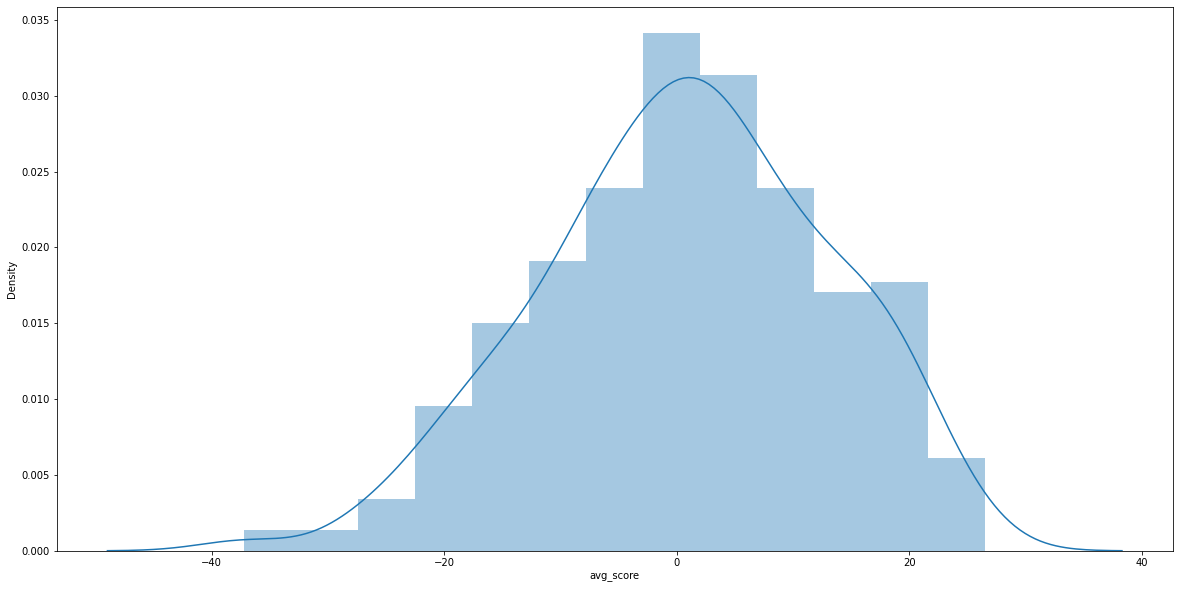

In [ ]:
sns.distplot(res)

### Correlation Feature Selection

In [ ]:
data.head()

,gender,race/ethinicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,0,0,4,0,0,72,72,74,72.666667
1,0,1,2,0,1,69,90,88,82.333333
2,0,0,5,0,0,90,95,93,92.666667
3,1,2,3,1,0,47,57,44,49.333333
4,1,1,2,0,0,76,78,75,76.333333


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 10.280731
Feature 1: 22.569262
Feature 2: 37.768587
Feature 3: 61.343235
Feature 4: 47.556517


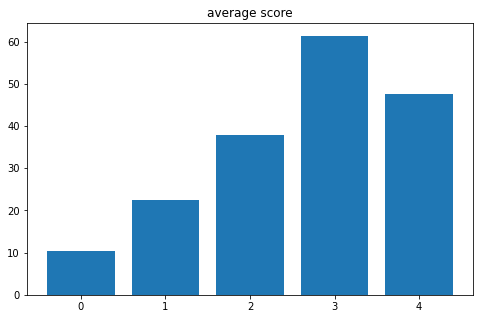

<Figure size 1440x720 with 0 Axes>

In [ ]:
# plot the scores
plt.figure(figsize=(8,5))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title('average score')
plt.show()
plt.savefig('avg_score.png')

In [ ]:
features

['gender',
 'race/ethinicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [ ]:
data[['math score','test preparation course' ]].corr() 

,math score,test preparation course
math score,1.000000,0.181127
test preparation course,0.181127,1.000000


# Answer Questions
### Objective:
**ให้สร้าง model ทำนายผลคะแนนเฉลี่ย และตอบคำถามต่อไปนี้**

## การเรียน test preparation course ส่งผลต่อผลคะแนนวิชาเลขไหม?

* จากกราฟด้านล่าง test_completed และ test_none ไม่แตกต่างกัน
* เมื่อดูจากค่า correlation พบว่า test_completed และ test_none มีค่าเท่ากับ 0.181127 อยู่ในช่วง 0 <= r < 0.3
* ดังนั้น test preparation course มีความสัมพันธ์กับ math score ในระดับต่ำมาก (แทบจะไม่มีความสัมพันธ์กัน)
* จึงสรุปได้ว่า การเรียน test preparation course ไม่ส่งผลต่อผลคะแนนวิชาเลข

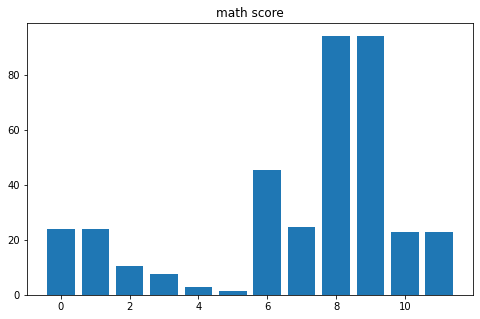

Feature ที่ส่งผลต่อ Math Score คือ lunch , race_group E และ test preparation course ตามลำดับ

In [ ]:
data[['math score', 'test_completed', 'test_none']].corr()

## การเรียน test preparation course ส่งผลต่อผลคะแนนวิชาการอ่านไหม?

* จากกราฟด้านล่าง test_completed และ test_none ไม่แตกต่างกัน
* เมื่อดูจากค่า correlation พบว่า test_completed และ test_none มีค่าเท่ากับ 0.243333 อยู่ในช่วง 0 <= r < 0.3
* ดังนั้น test preparation course มีความสัมพันธ์กับ reading score ในระดับต่ำมาก (แทบจะไม่มีความสัมพันธ์กัน)
* จึงสรุปได้ว่า การเรียน test preparation course ไม่ส่งผลต่อผลคะแนนวิชาเขียน

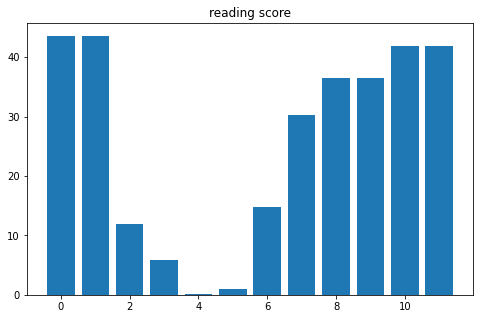

Feature ที่ส่งผลต่อ Reading Score มากที่สุด คือ gender, test prepareation course, และ lunch ตามลำดับ

In [ ]:
data[['reading score', 'test_completed', 'test_none']].corr()

## การเรียน test preparation course ส่งผลต่อผลคะแนนวิชาการเขียนไหม?

* จากกราฟด้านล่าง test_completed และ test_none ไม่แตกต่างกัน
* เมื่อดูจากค่า correlation พบว่า test_completed และ test_none มีค่าเท่ากับ 0.313639 อยู่ในช่วง 0.3 <= r < 0.5
* ดังนั้น test preparation course มีความสัมพันธ์กับ writing score ในระดับต่ำ
* จึงสรุปได้ว่า การเรียน test preparation course ส่งผลต่อผลคะแนนวิชาเขียนน้อยมากๆ จนแทบจะไม่ส่งผล

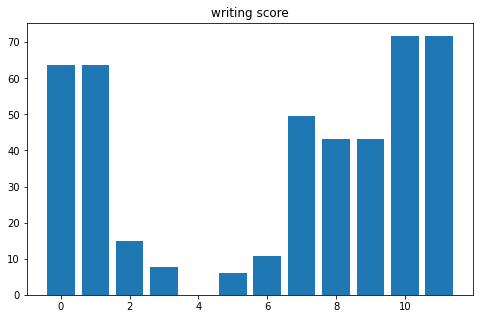

Feature ที่ส่งผลต่อ Writing Score มากที่สุด คือ test preparetion, และ gender ตามลำดับ

In [ ]:
data[['writing score', 'test_completed', 'test_none']].corr()

## ปัจจัย 3 ลำดับแรกที่ส่งผลต่อคะแนนเฉลี่ยของนักเรียน?

> * อันดับ 1. lunch
* อันดับ 2. test preparation course
* อันดับ 3. parental level of education

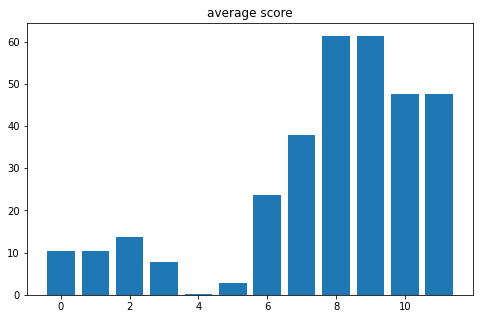